### Alinhamento de Sequências de DNA

###### Beatriz Rianho Bernardino
---

Dentro da bioInformática, o alinhamento de sequências de DNA possui extrema importância para a identificação de padrões e nível de indentidade entre nucleotídeos ou proteínas. Esse mecanismo auxilia, por exemplo, na detecção de mutações de vírus, identificação de genomas desconhecidos e no mapeamento de sequências expressas dentro de um genoma.

Para que tal alinhamento seja possível, existem diferentes estratégias computacionais que podem ser utilizadas. Como as sequências de DNA têm um tamanho elevado, é necessário levar em consideração o uso de memória e processamento que cada algoritmo necessita, realizando um trade-off entre a exatidão do alinhamento e o tempo de processamento. 

As estratégias utilizadas no presente relatório envolvem o uso de uma Heurística, método considerado 100% exploitation, um algoritmo baseado na busca por aleatoriedade, método que faz uso da exploration, e duas técnicas diferentes de busca exaustiva, estratégia que considera todas as combinações possíveis para o alinhamento. 


#### Entradas
---

O código abaixo é responsável por gerar arquivos com sequências aleatórias de tamanhos diferentes que serão utilizadas para as análises.

In [1]:
entradas=[]


In [2]:
import random

for i in range(10, 400,20):
    
    for j in range(0,100):

        n = i # tamanho da primeira sequência
        m =  random.randint(10, i)# tamanho da segunda sequência
        file = 'Entradas/dna{0}_{1}.seq'.format(i,j)  # nome do arquivo a ser gerado
        entradas.append(n)
        f = open(file, 'w')
        seq = [str(n)+'\n',
               str(m)+'\n',
               ''.join(random.choices(['A', 'T', 'C', 'G'], k=n))+'\n',
               ''.join(random.choices(['A', 'T', 'C', 'G'], k=m))]
        f.writelines(seq)
        f.close()
#     print(''.join(seq))


#### Função para rodar  cada estratégia com as entradas
---

In [3]:
import subprocess

def roda_com_entrada(executavel, arquivo_in):
    import time

    with open('{0}'.format(arquivo_in)) as f:

        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()


    return (proc.stdout, end - start)

#### Heurística de Alinhamento Local de Smith-Waterman¶ 
---

Ao utilizar uma Heurística de alinhamento,  é possível obter resultados aproximados mas não há a garantia de que a solução se trata de um máximo global do problema proposto, ou seja, a solução pode não ser precisa. Em contrapartida, a velocidade dessa estratégia é elevada, possibilitando um maior volume de alinhamento em menor tempo.

Para solucionar o problema, foi utilizado o algoritmo de Smith Waterman através do preenchimento de uma matriz dinâmica. Cada linha da matriz corresponde a uma letra da sequência A, e cada coluna está relacionada a uma letra da sequência B. Desse modo, quando as letras são iguais, a célula correspondente recebe 2 (match), e se forem diferentes, recebe -1 (mismatch ou gap). Com a matriz preenchida, o alinhamento das sequências é feito a partir da célula com maior valor até chegar uma célula de valor 0, ou o início da matriz.

Portanto, ao rodar o problema com entradas de diferentes tamanhos, obtemos os seguintes resultados:

In [4]:
tempos_heu=[]

In [5]:
import numpy as np

for i in range(10,400,20):
    avg_time=[]
    for j in range (0,100):
        out, time= roda_com_entrada('./Heuristica/ingenuo', 'Entradas/dna{0}_{1}.seq'.format(i,j))
        avg_time.append(time)
    tempos_heu.append(np.mean(avg_time))

In [6]:
heu_en = []
for i in entradas:
    if i not in heu_en:
        heu_en.append(i)

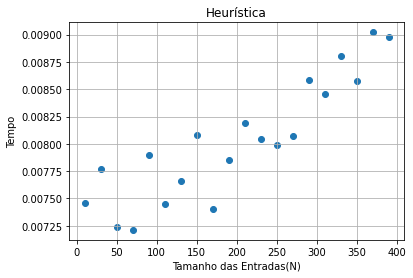

In [7]:
import matplotlib.pyplot as plt

plt.scatter(heu_en, tempos_heu)
plt.xlabel("Tamanho das Entradas(N)")
plt.ylabel("Tempo")
plt.title("Heurística")
plt.grid()
plt.show()

A partir do gráfico, é importante perceber que o tempo de execução para as entradas propostas é extremamente baixo, até quando N é alto. Mesmo assim, nota-se que existe uma tendência de crescimento no tempo, quando o tamanho das entradas aumenta. 

O valgrind foi utilizado como técnica de profiling e notou-se que o uso de ***cin*** e ***cout*** são responsáveis pelo maior número de anotações. 

#### Algoritmo Local de Alinhamento
---

Com o objetivo de observar o comportamento do exploration no problema de alinhamento, fez-se uso da aleatoriedade ao comparar duas sequências. Desse modo, ao invés de comparar todas as letras de cada sequência, o algoritmo compara subsequências de A e B adquiridas de maneira aleátoria. Essa comparação é realizada com 100 subsequências aleatórias e, no fim, retorna-se o par (sub_a, sub_b) que resultou no melhor score de alinhamento.
Para garantir o alinhamento dessas subsequências, o score foi calculado a partir da mesma matriz dinâmica utilizada na Heurística.

Assim, é possível observar os seguintes resultados:

In [8]:
tempos_al=[]

In [9]:
for i in range(10,200,20):
    avg_time=[]
    for j in range (0,100):
        out, time= roda_com_entrada('./Aleatorizacao/aleatorio', 'Entradas/dna{0}_{1}.seq'.format(i,j))
        avg_time.append(time)
    tempos_al.append(np.mean(avg_time))

In [10]:
al_en = []
for i in entradas[:1000]:
    if i not in al_en:
        al_en.append(i)

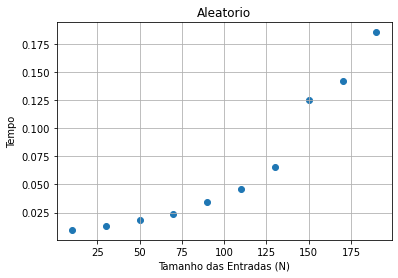

In [11]:
import matplotlib.pyplot as plt

plt.scatter(al_en, tempos_al)
plt.xlabel("Tamanho das Entradas (N)")
plt.ylabel("Tempo")
plt.title("Aleatorio")
plt.grid()
plt.show()

Para essa estratégia, devido ao tempo de execução mais alto, apenas 200 entradas foram rodadas. Desse modo, é possível observar que esse método precisa de um maior tempo para obter os scores, quando comparada com a Heurística. Além disso, a tendência também é de aumentar conforme o tamanho das sequências aumenta. 

Outro ponto a ser observado na busca local, é que como faz-se uso da aleatoriedade, nem sempre o valor encontrado será um máximo global, dado que as subsequências sorteadas podem não ser a combinação que resulta no melhor valor ( como na busca exaustiva). Esse fato é influenciado por dois fatores: o número de sequências geradas (p), e o tamanho das sequências a serem analisadas (k).  Ambas as variáveis foram calculadas de maneira aleatória, com k podendo ter no máximo o tamanho da maior sequência, e p um valor entre 2 e o tamanho da primeira sequência.

É possível perceber que é importante existir um balanceamento entre essas duas variáveis, pois se o  k for muito alto, as subsequências geradas já vão ter uma maior extensão, levando em consideração mais letras na comparação, e, por isso, não é necessário gerar tantas sequências. Por outro lado, com um k pequeno, menos letras são levadas em consideração e, por isso, quanto mais subsequências forem geradas, maior a probabilidade de um resultado ótimo.

Com N menores, essa estratégia pode resultar em um menor desempenho em relação ao score máximo, mas conforme o tamanho das sequências aumenta, a probabiladade do score ficar mais preciso melhora também.


Ao utilizar o Valgrind como técnica de profilig, pode-se observar que o uso da matriz dinâmica para o cálculo do score foi a parte que mais demandou processamento. Por esse motivo, o cálculo simples do score de alinhamento entre as subsequências aparenta ser mais adequado para essa estratégia.

```

69,032              for (int linha=1; linha <= k; linha++){
      .          
344,181                  for(int coluna=1; coluna<=k; coluna++){
      .                  
      .                      int score;
      .                      int diagonal;
      .                      int delecao;
      .                      int insercao;
344,181                      score= sa[linha]==sb[coluna]? 2:-1;
458,908                      diagonal= H[linha-1][coluna-1]+ score;
688,362                      delecao=H[linha-1][coluna]-1;
      .                      insercao=H[linha][coluna-1]-1;
      .  
114,727                      H[linha][coluna]= std::max({0, diagonal, delecao, insercao});
      .                  
      .                      
      .                  }
      .              }
      .              
      .     
 42,060              for (int i = 0; i <= k; i++) {
299,001                  for (int j = 0; j <= k; j++) {
330,243                      if (H[i][j] > total_score) {
      .                          total_score = H[i][j];
      .                         
      .                      }
      .                  }
      .              }
      
```

#### Busca Exaustiva
---

Por fim, a última estratégia utilizada foi a da Busca exaustiva. Esse método realiza todas as combinações de alinhamento possíveis entre as sequências, garantindo assim, um resultado ótimo. Porém, justamente por realizar todas as combinações, necessita-se de um maior tempo de processamento.  Para esse método, duas estratégias diferentes foram adotadas:

    1. Calcular o score de alinhamento entre duas subsequências através da matriz dinâmica já usada anteriormente
    2. Realizar um truncamento do tamanho da maior sequência pela menor, e calcular um score simples entre essas duas subsequências

É possível observar o desempenho de cada uma das estratégias conforme o tamanho das sequências aumenta abaixo:

In [1]:
tempos_ex1=[]

In [4]:
for i in range(10,100,20):
    avg_time=[]
    for j in range (0,100):
        out, time= roda_com_entrada('./Exaustiva/exaustiva', 'Entradas/dna{0}_{1}.seq'.format(i,j))
        avg_time.append(time)
    tempos_ex1.append(np.mean(avg_time))

OSError: [Errno 8] Exec format error: './Exaustiva/exaustiva'

In [14]:
ex1_en = []
for i in entradas[:500]:
    if i not in ex1_en:
        ex1_en.append(i)

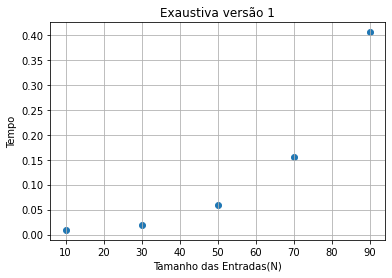

In [15]:
import matplotlib.pyplot as plt

plt.scatter(ex1_en, tempos_ex1)
plt.xlabel("Tamanho das Entradas(N)")
plt.ylabel("Tempo")
plt.title("Exaustiva versão 1")
plt.grid()
plt.show()

A partir do gráfico acima, pode-se notar que o tempo de execução dessa estratégia é consideravelmente mais elevado, embora garanta um máximo local.

Ao rodar o Valgrind, a parte com mais anotações foi a responsável por calcular o score. Ainda assim, ela possui um desempenho melhor do que a matriz dinâmica (técnica da exaustiva 2). 

Ao gerar duas subsequências, essa técnica visa deixá-las com o mesmo tamanho, realizando um truncamento da maior pela menor. Isso significa que algumas combinações de caracteres são perdidos durante o processo. Por esse motivo, os scores obtidos não foram os máximos globais (scores mostrados mais abaixo no relatório).



```
57,101              for(int i=0; i<int(sa.size()); i++){
55,594                  score+= (sa[i] == sb[i] ? 2:-1);
     .             
     .              }
```

In [22]:
tempos_ex2=[]
en_ex2=[]

In [23]:
for i in range(2, 40,2):
    
    for j in range(0,100):

        n = i # tamanho da primeira sequência
        m =  random.randint(2, i)# tamanho da segunda sequência
        file = 'Entradas/ex2/dna{0}_{1}.seq'.format(i,j)  # nome do arquivo a ser gerado
        en_ex2.append(n)
        f = open(file, 'w')
        seq = [str(n)+'\n',
               str(m)+'\n',
               ''.join(random.choices(['A', 'T', 'C', 'G'], k=n))+'\n',
               ''.join(random.choices(['A', 'T', 'C', 'G'], k=m))]
        f.writelines(seq)
        f.close()
#     print(''.join(seq))


In [24]:
for i in range(2,40,2):
    avg_time=[]
    for j in range (0,100):
        out, time= roda_com_entrada('./Exaustiva/exaustiva_dois', 'Entradas/ex2/dna{0}_{1}.seq'.format(i,j))
        avg_time.append(time)
    tempos_ex2.append(np.mean(avg_time))

In [25]:
ex2 = []
for i in en_ex2:
    if i not in ex2:
        ex2.append(i)

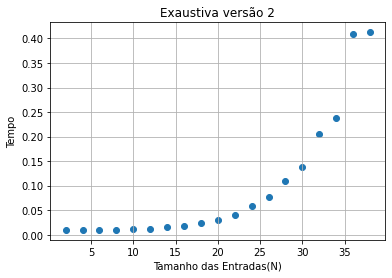

In [26]:
import matplotlib.pyplot as plt

plt.scatter(ex2, tempos_ex2)
plt.xlabel("Tamanho das Entradas(N)")
plt.ylabel("Tempo")
plt.title("Exaustiva versão 2")
plt.grid()
plt.show()

Ao rodar o Valgrind, percebe-se que o maior consumo computacional está relacionado com o preenchimento da matriz dinâmica:

```
245,025                      score=sa[linha]==sb[coluna]?2:-1;
 96,800                      diagonal= H[linha-1][coluna-1]+ score;
 96,800                      delecao=H[linha-1][coluna]-1;
145,200                      insercao=H[linha][coluna-1]-1;
      .  
 48,400                      H[linha][coluna]= std::max({0, diagonal, delecao, insercao});
 48,400                      if(H[linha][coluna]==diagonal){
      .                  
 39,516                          salto[linha][coluna].salto=0;
      .  
      .                      }
 57,284                      else if(H[linha][coluna]==delecao){
      .                          
 22,284                          salto[linha][coluna].salto= 1;
      .  
      .                      }
 42,428                      else if(H[linha][coluna]==insercao){
      .                          
 13,774                          salto[linha][coluna].salto= 2;
      .  
      .                      }
      .                  }
      .              }
      .  
      .          
 45,375              for (int i = 0; i < int(sa.size()); i++) {
408,371                  for (int j = 0; j <= int(sb.size()); j++) {
181,500                      if (H[i][j] > maxScore) {
      .                          best_a="";
      .                          best_b="";
     16                          maxScore = H[i][j];
      .                          int l=i;
      .                          int c=j;
      .      
```



Essa outra estratégia também garante máximos globais, porém consumiu até mais tempo que a busca exaustiva com o trucamento, devido a forma em que o score foi calculado. Enquanto a primeira busca exaustiva calcula o score de maneira simples, guardando-o em uma variável, essa estratégia faz o uso de uma matriz dinâmica, com muitos acessos a memória, necessitando assim de mais capacidade computacional, e, portanto, maior tempo de execução. Apesar do resultado ótimo, é importante refletir até que ponto vale a pena fazer o uso desse mecanismo. Por isso, a partir das análises a seguir, será possível perceber quais estratégias se mostram mais vantajosas em relação as outras.

#### Comparação entre Estratégias
---

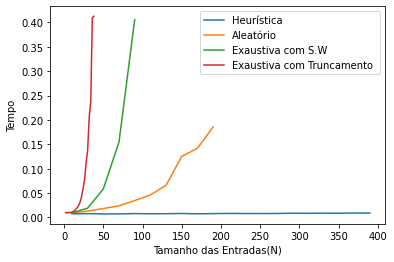

In [29]:
plt.plot(heu_en, tempos_heu, label="Heurística")
plt.plot(al_en, tempos_al, label="Aleatório")
plt.plot(ex1_en, tempos_ex1, label="Exaustiva com S.W")
plt.plot(ex2, tempos_ex2, label="Exaustiva com Truncamento ")
plt.xlabel("Tamanho das Entradas(N)")
plt.ylabel("Tempo")
plt.legend()
plt.show()


Como dito anteriormente, ao considerar apenas o tempo de execução do alinhamento, a Heurística se destaca frente as outras estratégias, enquanto as buscas exaustivas apresentam um crescimento exponencial do tempo em relação ao  tamanho das entradas. Isso significa que mesmo se houvesse uma paralelização das buscas exaustivas, seu desempenho a longo prazo ainda seria menor que a Heurística, e possívelmente que a aleatória também.

Porém, outro fator essencial para analisar o desempenho dos métodos é o score máximo de alinhamento obtido:

In [30]:
out_heu, time_heu= roda_com_entrada('./Heuristica/ingenuo', 'Entradas/dna{0}_{1}.seq'.format(90,0))
out_al, time_al= roda_com_entrada('./Aleatorizacao/aleatorio', 'Entradas/dna{0}_{1}.seq'.format(90,0))
out_ex1, time_ex1= roda_com_entrada('./Exaustiva/exaustiva', 'Entradas/dna{0}_{1}.seq'.format(90,0))
out_ex2, time_ex2= roda_com_entrada('./Exaustiva/exaustiva_dois', 'Entradas/dna{0}_{1}.seq'.format(90,0))



In [31]:
score_al= [int(i) for i in out_al.split() if i.isdigit()]


In [32]:
import re

score_heu=int(re.findall(r'\d+', out_heu)[0])
score_ex1=int(re.findall(r'\d+', out_ex1)[0])
score_ex2=int(re.findall(r'\d+', out_ex2)[0])
score_al=max(score_al)



In [33]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Estratégia", "Score Máximo", "Tamanho da Sequência", "Tempo de execução"])
 
# Add rows
myTable.add_row(["Heurística S.W", score_heu, 90, time_heu ])
myTable.add_row(["Busca Aleatória", score_al, 90, time_al])
myTable.add_row(["Busca Exaustiva por Truncamento", score_ex1, 90, time_ex1])
myTable.add_row(["Busca Exaustiva por S.W", score_ex2, 90, time_ex2])

print(myTable)

+---------------------------------+--------------+----------------------+----------------------+
|            Estratégia           | Score Máximo | Tamanho da Sequência |  Tempo de execução   |
+---------------------------------+--------------+----------------------+----------------------+
|          Heurística S.W         |      53      |          90          | 0.011076643997512292 |
|         Busca Aleatória         |      53      |          90          | 0.05840627499856055  |
| Busca Exaustiva por Truncamento |      16      |          90          |  0.9468512489984278  |
|     Busca Exaustiva por S.W     |      53      |          90          |  157.04119990800245  |
+---------------------------------+--------------+----------------------+----------------------+


A análise foi feita com uma entrada de tamanho 90. Com isso, o Score obtido com a busca local e Heurística foi igual o score obtido na Busca Exaustiva por S.W, ou seja, foram máximos globais. Embora não exista a garantia que isso sempre irá acontecer, os resultados obtidos são próximos o suficiente para serem utilizados com confiança. 

Ainda, com esse N, é possível também observar a discrepância entre os tempos de execuções, indicando que para as aplicações reais do problema, em que as sequências possuem tamanho extremamente alto, o tempo de processamenro é inviável, sendo necessário escolher outras opções.

Por fim, como dito anteriormente, era de se esperar que a Busca exaustiva por truncamento retornasse também um máximo global. Porém, provavelmente a técnica utilizada, em que  os últimos caracteres da sequência maior são descartados, resultou em perdas de combinações importantes, diminuindo assim o score.

---